In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import platform
from matplotlib import font_manager, rc
import seaborn as sns # 데이터셋을 가져오기 위해 import

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
    
# 그래프에서 음수를 사용하기 위한 설정
plt.rcParams['axes.unicode_minus'] = False

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

In [4]:
uni = pd.read_csv('./data/descriptive.csv')
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   resident  279 non-null    float64
 1   gender    300 non-null    int64  
 2   age       300 non-null    int64  
 3   level     287 non-null    float64
 4   cost      271 non-null    float64
 5   type      274 non-null    float64
 6   survey    187 non-null    float64
 7   pass      279 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 18.9 KB


count    300.000
mean       1.420
std        0.546
min        0.000
25%        1.000
50%        1.000
75%        2.000
max        5.000
Name: gender, dtype: float64
1    173
2    124
0      2
5      1
Name: gender, dtype: int64
1    173
2    124
Name: gender, dtype: int64


<Axes: >

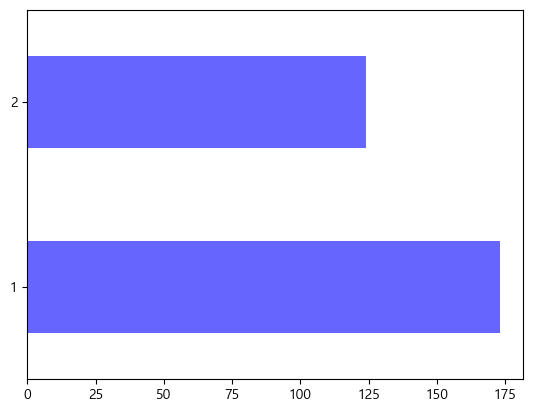

In [15]:
# gender 는 성별을 구분하기 위한 변수
# 명목 척도이므로 요약 통계량은 의미가 없으며 구성 비율만 의미를 가짐
print(uni['gender'].describe()) # count는 의미가 있지만 평균, 최소 등은 의미가 없음

# 각 성별에 대한 인원수
# 명목 척도는 구성만 확인해도 빠르게 이상치를 파악할 수 있음
print(uni['gender'].value_counts()) 
# 0 과 5 라는 이상치가 존재
# 이상치가 존재하면 카테고리 형의 데이터에서는 제거하는 경우가 많고
# 양을 나타내는 경우는 정규화나 표준화를 통해 숫자의 범위를 조정하기도 함

# gender 에서 이상치인 데이터 제거하고 1과 2만 추출
uni_gender = uni[(uni['gender'] == 1) | (uni['gender'] == 2)]
# 결과 확인 - 0, 5 이상치가 사라짐
print(uni_gender['gender'].value_counts()) 

# 성별 비율을 시각화 - 막대나 파이 차트를 통해 시각화
uni_gender['gender'].value_counts().plot(kind = 'barh', color = 'b', alpha = 0.6)

1.0    115
2.0     99
3.0     70
Name: level, dtype: int64


<Axes: >

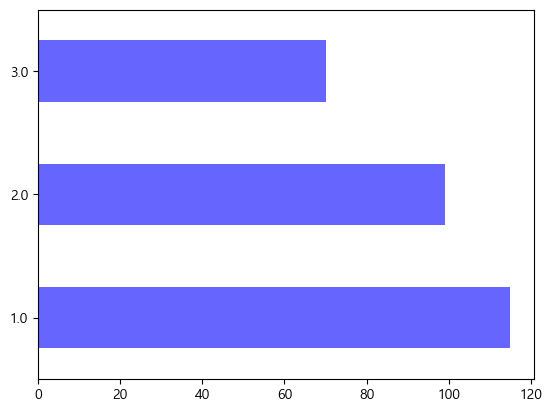

In [18]:
# level(학력) 항목은 순서 척도에 해당
# level 항목에 대한 데이터 파악
print(uni_gender['level'].value_counts()) # 이상치 없음

uni_gender['level'].value_counts().plot(kind = 'barh', color = 'b', alpha = 0.6)
# 우리나라 평균 학력에 대한 데이터를 함께 보여줘서
# 이 데이터의 신뢰도를 높일 수 있음

count    185.000
mean       2.589
std        0.980
min        1.000
25%        2.000
50%        2.000
75%        3.000
max        5.000
Name: survey, dtype: float64
2.0    72
3.0    61
4.0    24
1.0    21
5.0     7
Name: survey, dtype: int64


<Axes: ylabel='survey'>

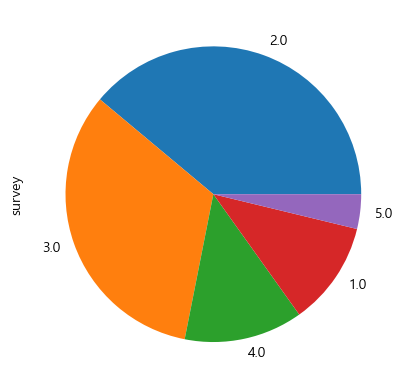

In [23]:
# survey 항목은 등간 척도에 해당
print(uni_gender['survey'].describe()) # 통계량
print(uni_gender['survey'].value_counts()) # 구성 비율

# survey 항목을 가지고 파이 차트를 그림
uni_gender['survey'].value_counts().plot(kind = 'pie')

In [25]:
# cost 항목은 비율 척도에 해당

print(uni_gender['cost'].describe()) # 통계량
# cost의 값의 종류가 너무 많음
# 비율 척도는 직접 입력하는 형태가 되므로 
# 이상치나 결측치의 발생 가능성이 높음
# UI를 만들 때 다른 척도에 비해 주의를 기울여야 함
#print(uni_gender['cost'].value_counts()) # 구성 비율
# 값의 범위가 너무 넓으며 이상치도 존재

count    268.000
mean       8.754
std       69.356
min     -457.200
25%        4.400
50%        5.400
75%        6.300
max      675.000
Name: cost, dtype: float64


In [59]:
# 일반적인 생활비의 범위를 2 ~ 10 으로 설정 - 분석가의 주관
cost = uni_gender['cost']
print(cost[(cost >= 2) & (cost <= 10)].describe())
#print(cost[(cost >= 2) & (cost <= 10)].value_counts())

count    248.000
mean       5.354
std        1.139
min        2.100
25%        4.600
50%        5.400
75%        6.200
max        7.900
Name: cost, dtype: float64


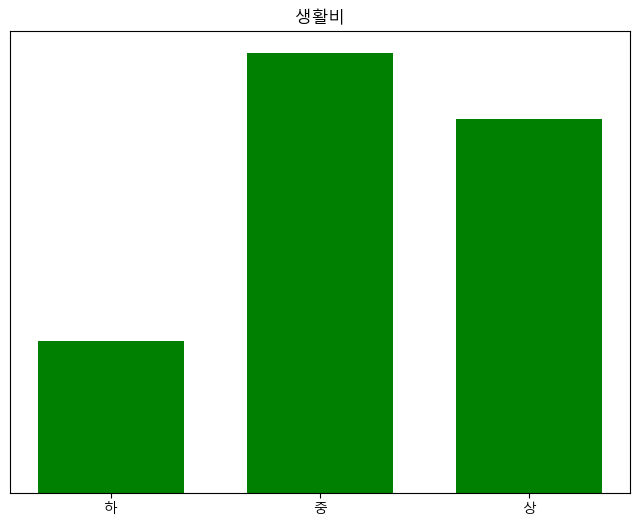

In [44]:
# cost 항목의 빈도 분석을 위해서 3개 구간으로 분할해서 시각화

# 시각화를 위한 영역 설정
plt.figure(figsize = (8, 6))
plt.title('생활비')

# 데이터 가져오기
ys, xs, patches = plt.hist(cost[(cost >= 2) & (cost <= 10)],
                          bins = 3, # 구간의 갯수
                          density = True, # 백분율을 표시할지
                          cumulative = False, # 누적 여부
                          histtype = 'bar', # 그래프의 형태
                          orientation = 'vertical', # 그래프 방향
                          rwidth = 0.7, # 가로 너비
                          color = 'green' # 색상
                          )

#plt.ylabel('구성 비율')
# y 축 레이블 제거
plt.yticks([])

# x 축 레이블 추가
plt.xticks([(xs[i] + xs[i+1]) / 2 for i in range(0, len(xs) -1)], ['하', '중', '상'])

plt.show()

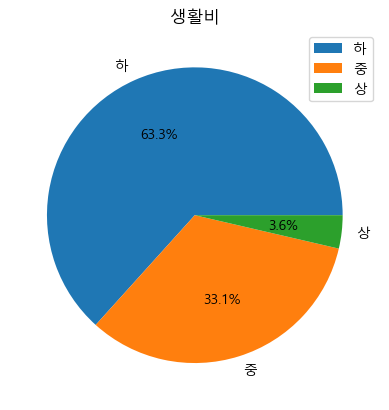

In [65]:
# cost를 구간을 나눠서 파이 차트로 그리기

# 범위에 속한 데이터만 가져오기
cost = uni_gender['cost']
cost = cost[(cost >= 2) & (cost <= 10)]

# 직접 구간화를 진행
# 범위를 범주화
cost[(cost >= 1) & (cost <= 3)] = 1
cost[(cost > 3) & (cost <= 6)] = 2
cost[(cost > 6) & (cost <= 10)] = 3

# int로 데이터 자료형 변화
cost = cost.astype(int)
#print(cost)

# 파이 차트 그리기
# autopct(autopercent)는 소수 아래 1자리까지 나타낸다는 의미
plt.pie(cost.value_counts(), labels = ['하', '중', '상'], autopct = '%1.1f%%')
plt.title('생활비')
plt.legend() # 범례 표시(그래프에서 오른쪽 위의 네모)
plt.show()

In [73]:
import math

s = pd.Series([100, 110, 105])

# 산술 평균
#print('평균 성장률 : ', s.pct_change()) 
print('평균 성장률 : ', s.pct_change().mean())
print(100 * (1.027272727272727337) ** 2) # 105.5289

# 기하 평균
print('기하 평균 : ', math.sqrt((110/100)*(105/110)))
print(100 * (1.02469507659596) ** 2) # 105.0000

평균 성장률 :  0.027272727272727337
105.52892561983474
기하 평균 :  1.02469507659596
105.00000000000003


In [80]:
# 평균과 중앙값 구하기

# 절사 평균을 구하기 위한 import
from scipy import stats

# 계산에 사용할 데이터 가져오기 및 확인
tdata = pd.read_csv('./data/tdata.csv', encoding = 'cp949')
#print(tdata.head())
#tdata.info()

# 평균
print('평균 : ', tdata['성적'].mean()) # 77.1
# 중앙값
print('중앙값 : ', tdata['성적'].median()) # 77.5
# 절사 평균 - 데이터와 삭제할 비율을 설정
# 비율 10%는 하위와 상위 각각 0.05에 해당
print('절사 평균 : ', stats.trim_mean(tdata['성적'], 0.1)) # 77.0
# 평균과 절사 평균이 거의 차이가 나지 않기 때문에 이상치를 갖지 않는 데이터

평균 :  77.1
중앙값 :  77.5
절사 평균 :  77.0


In [81]:
# 가중 평균이나 가중 중앙값을 구하기 위한 wquantiles 패키지 설치
!pip install wquantiles

In [91]:
# 각 주의 이름, 인구, 살인사건 발생률, 약자 데이터를 가짐
# population은 인구이고 Murder.Rate는 살인사건 발생률
# 살인사건 발생률의 평균을 바로 구하는 것은 인구수에 대한 가중치를
# 부여하지 않았기 때문에 결과가 왜곡될 수 있음
state = pd.read_csv('./data/state.csv')
print(state.head())

# 가중치가 없는 평균, 중앙값
print('평균 : ',  state['Murder.Rate'].mean()) # 4.066
print('중앙값 : ',  state['Murder.Rate'].median()) # 4.0

# 가중 평균과 가중 중앙값 구하기
import wquantiles

# 가중 평균은 numpy의 함수 사용
print('인구에 가중치를 부여한 평균 : ', 
      np.average(state['Murder.Rate'], weights = state['Population'])) # 4.445
print('인구에 가중치를 부여한 중앙값 : ', wquantiles.median(state['Murder.Rate'], 
                                               weights = state['Population'])) # 4.4

        State  Population  Murder.Rate Abbreviation
0     Alabama     4779736          5.7           AL
1      Alaska      710231          5.6           AK
2     Arizona     6392017          4.7           AZ
3    Arkansas     2915918          5.6           AR
4  California    37253956          4.4           CA
평균 :  4.066
중앙값 :  4.0
인구에 가중치를 부여한 평균 :  4.445833981123393
인구에 가중치를 부여한 중앙값 :  4.4
